In [1]:
import yfinance as yf
def extract_tesla_stock_data():
  
    ticker_symbol = "TSLA"

    start_date = "2022-01-01"
    end_date = "2022-12-31"

    tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)
 
    tesla_data_reset_index = tesla_data.reset_index()   
    csv_file_path = 'tesla_stock_data.csv'
    tesla_data_reset_index.to_csv(csv_file_path, index=False)

    print(tesla_data_reset_index.head())
extract_tesla_stock_data()


[*********************100%***********************]  1 of 1 completed
                       Date        Open        High         Low       Close  \
0 2022-01-03 00:00:00-05:00  382.583344  400.356659  378.679993  399.926666   
1 2022-01-04 00:00:00-05:00  396.516663  402.666656  374.350006  383.196655   
2 2022-01-05 00:00:00-05:00  382.216675  390.113342  360.336670  362.706665   
3 2022-01-06 00:00:00-05:00  359.000000  362.666656  340.166656  354.899994   
4 2022-01-07 00:00:00-05:00  360.123322  360.309998  336.666656  342.320007   

    Adj Close     Volume  
0  399.926666  103931400  
1  383.196655  100248300  
2  362.706665   80119800  
3  354.899994   90336600  
4  342.320007   84164700  


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
def scrape_tesla_revenue():
    
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla-inc/revenue"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', {'class': 'historical_data_table'})
        headers = [th.text.strip() for th in table.findAll('th')]
        rows = []
        for row in table.findAll('tr'):
            td = row
            td = row.find_all('td')
            if len(td) == len(headers):
                rows.append([data.text.strip() for data in td])

        tesla_revenue = pd.DataFrame(rows, columns=headers)

        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('[$,]', '').astype(float)
        tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

        return tesla_revenue

    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None
if __name__ == "__main__":
    tesla_revenue = scrape_tesla_revenue()
    if tesla_revenue is not None:
        print(tesla_revenue.tail())

Failed to retrieve data. Status code: 403


In [2]:
import yfinance as yf
import pandas as pd

def get_gme_stock_data():

    ticker_symbol = 'GME'
    start_date = '2022-01-01'
    end_date = '2024-01-30'
    gme_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    return gme_data
if __name__ == "__main__":

    gme_data = get_gme_stock_data()
    gme_data.reset_index(inplace=True)

    gme_data.to_csv('gme_stock_data.csv', index=False)
    print(gme_data.head())

[*********************100%***********************]  1 of 1 completed
                       Date       Open       High        Low      Close  \
0 2022-01-03 00:00:00-05:00  37.307499  39.845001  37.302502  38.209999   
1 2022-01-04 00:00:00-05:00  38.042500  38.247501  35.762501  37.227501   
2 2022-01-05 00:00:00-05:00  37.097500  37.212502  32.287498  32.342499   
3 2022-01-06 00:00:00-05:00  33.209999  34.424999  30.285000  32.757500   
4 2022-01-07 00:00:00-05:00  39.942501  40.077499  33.125000  35.154999   

   Adj Close    Volume  
0  38.209999   5654800  
1  37.227501   7339600  
2  32.342499  13585600  
3  32.757500  24206000  
4  35.154999  48549200  


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape GameStop revenue data
def scrape_gme_revenue():
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        gme_revenue = pd.DataFrame(data, columns=headers)

        return gme_revenue

    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None
if __name__ == "__main__":
    gme_revenue = scrape_gme_revenue()

    if gme_revenue is not None:
        print(gme_revenue.tail())

Failed to retrieve data. Status code: 403


[*********************100%***********************]  1 of 1 completed


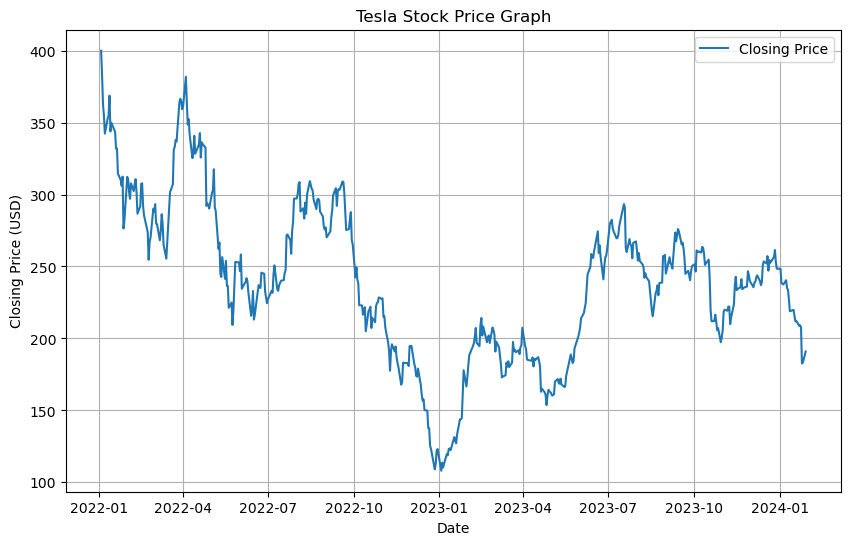

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
if __name__ == "__main__":
    ticker_symbol = 'TSLA'
    start_date = '2022-01-01'
    end_date = '2024-01-30'

    tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    tesla_data.reset_index(inplace=True)
    make_graph(tesla_data, title='Tesla Stock Price Graph')

[*********************100%***********************]  1 of 1 completed


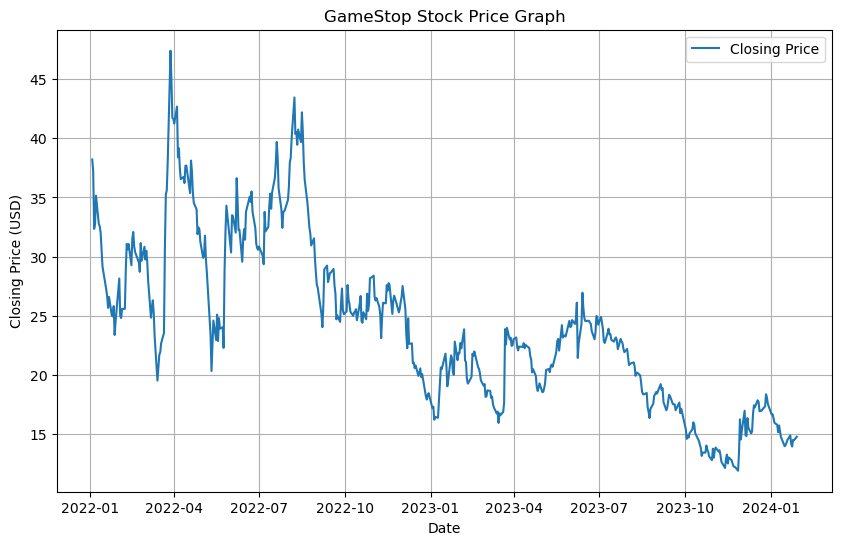

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
if __name__ == "__main__":
    ticker_symbol = 'GME'
    start_date = '2022-01-01'
    end_date = '2024-01-30'

    gme_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    gme_data.reset_index(inplace=True)
    make_graph(gme_data, title='GameStop Stock Price Graph')